In [12]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the ocurrence of optimal tree among estimated champion trees

In [127]:
file_template = 'data/%s_%s.csv'
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'

def get_results(model_name, size):
    df = pd.read_csv(file_template % (model_name, str(size)))    
    df.tree = df.tree.astype(str).map(lambda t: ' '.join(sorted(t.split())))
    return df

def correct_found(model_name, sz):
    xx = get_results(model_name, str(sz))
    return len(xx[(xx.tree==correct_model)])

def correct_detected(model_name, sz):
    xx = get_results(model_name, str(sz))
    return len(xx[(xx.tree==correct_model) & (xx.opt == 1)])

def results_table(mdl):
    df = pd.DataFrame(columns= ['model', 'sample_size', 'exists', 'identified'])
    for s in sizes:
        df.loc[len(df)] = [mdl, s, correct_found(mdl, s), correct_detected(mdl, s)]
    return df
alpha = 1.0
def plot_table(df):
    plt.figure()
    plt.bar(df.sample_size, df.exists, width=1000, label='existing')
    plt.bar(df.sample_size, df.identified, width=1000, label='identified', alpha=alpha)
    plt.ylabel('occurrences')
    plt.title('Correct tree occurrence and identification')
    plt.xticks([5000, 10000, 20000])
    plt.show()
    
def plot_table2(df, df2):
    plt.figure(figsize=(18, 6))
    plt.subplot('121')
    plt.bar(df.sample_size, df.exists, width=1000, label='existing')
    plt.bar(df.sample_size, df.identified, width=1000, label='identified', alpha=alpha)
    plt.ylabel('occurrences')
    plt.title('Correct tree occurrence and identification')
    plt.xticks([5000, 10000, 20000])

    plt.subplot('122')
    plt.bar(df2.sample_size, df2.exists, width=1000, label='existing')
    plt.bar(df2.sample_size, df2.identified, width=1000, label='identified', alpha=alpha)
    plt.ylabel('occurrences')
    plt.title('Correct tree occurrence and identification')
    plt.xticks([5000, 10000, 20000])
    plt.show()


In [119]:
## Model 1
## 'exists' -> times that the correct tree was found amongst the champion_trees
## 'identified' -> times that the correct tree was identified by the procedure

In [120]:
model1 = results_table('model1')
model1

,model,sample_size,exists,identified
0,model1,5000,37,23
1,model1,10000,55,38
2,model1,20000,89,80


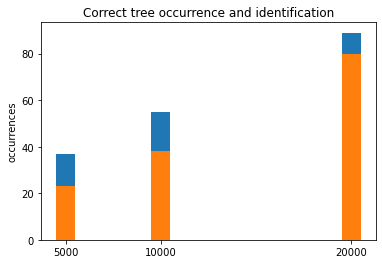

In [121]:
plot_table(model1)

In [122]:
## Model 2
## 'exists' -> times that the correct tree was found amongst the champion_trees
## 'identified' -> times that the correct tree was identified by the procedure

In [123]:
model2 = results_table('model2')
model2

,model,sample_size,exists,identified
0,model2,5000,76,59
1,model2,10000,92,86
2,model2,20000,100,98


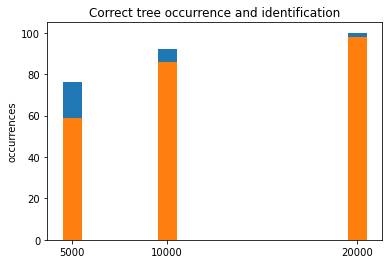

In [124]:
plot_table(model2)

<ipython-input-127-86c64fe561e0>:35: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('121')
<ipython-input-127-86c64fe561e0>:42: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('122')


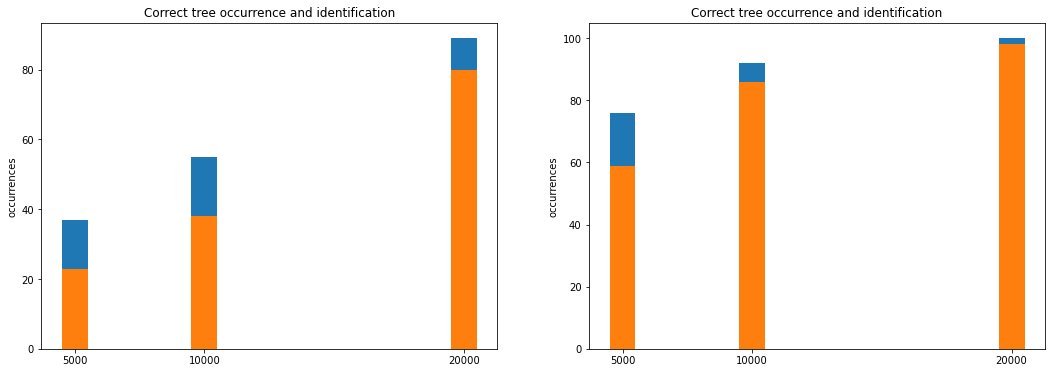

In [128]:
plot_table2(model1, model2)